In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os
seed = 12
np.random.seed(seed)

In [ ]:
audio = "/content/drive/My Drive/Dataset GTZAN/Data/genres_original/"
folders = os.listdir(audio)
folders.sort() 
folders[0:5]

['blues', 'classical', 'country', 'disco', 'hiphop']

In [ ]:
genre = []
file_path = []
for i in folders:
    filename = os.listdir(audio + i)
    for f in filename: 
        part = f.split('.')[0]
        genre.append(part)
        file_path.append(audio + i + '/' + f)

In [ ]:
print(genre)

['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classic

In [ ]:
print(file_path)

['/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00003.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00002.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00007.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00000.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00001.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00005.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00004.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00006.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00009.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00015.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.00018.wav', '/content/drive/My Drive/Dataset GTZAN/Data/genres_original/blues/blues.000

In [ ]:
df = pd.DataFrame(genre)
#df = df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
df.columns = ['genre']
df = pd.concat([df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
df

,genre,path
0,blues,/content/drive/My Drive/Dataset GTZAN/Data/gen...
1,blues,/content/drive/My Drive/Dataset GTZAN/Data/gen...
2,blues,/content/drive/My Drive/Dataset GTZAN/Data/gen...
3,blues,/content/drive/My Drive/Dataset GTZAN/Data/gen...
4,blues,/content/drive/My Drive/Dataset GTZAN/Data/gen...
...,...,...
995,rock,/content/drive/My Drive/Dataset GTZAN/Data/gen...
996,rock,/content/drive/My Drive/Dataset GTZAN/Data/gen...
997,rock,/content/drive/My Drive/Dataset GTZAN/Data/gen...
998,rock,/content/drive/My Drive/Dataset GTZAN/Data/gen...


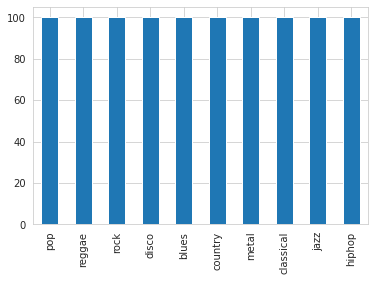

In [ ]:
df.genre.value_counts().plot(kind='bar')

In [ ]:
df.to_csv('/content/drive/My Drive/Uploads_csv/gtzanpath.csv')

In [ ]:
data = pd.DataFrame(columns=['feature'])

for i,path in enumerate(df.path):
  signal, sr = librosa.load(path)
  result=np.array([])
  mfccs=np.mean(librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40).T, axis=0)
  result=np.hstack((result, mfccs))

  stft=np.abs(librosa.stft(signal))
  chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
  result=np.hstack((result, chroma))

  mel=np.mean(librosa.feature.melspectrogram(signal, sr=sr).T,axis=0)
  result=np.hstack((result, mel))

  data.loc[i]=[result]

In [ ]:
final_data=pd.DataFrame(data['feature'].values.tolist())
final_data.head()

In [ ]:
modeldf=pd.concat([df, final_data], axis=1)

In [ ]:
modeldf=modeldf.drop(columns='path')

In [ ]:
modeldf.to_csv('/content/drive/My Drive/Uploads_csv/gtzanfeatures.csv')